In [43]:
import numpy as np
import pandas as pd
import os
import copy
import spacy
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import random
from urllib.parse import urlparse
import ast
from collections import defaultdict, Counter
import matplotlib.colors as colors

from datetime import datetime, timedelta
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
programming_languages = {
    "JavaScript",
    "Python",
    "Java",
    "C#",
    "PHP",
    "Ruby",
    "Swift",
    "Go",
    "TypeScript",
    "Kotlin",
    "Lisp",
    "OCaml",
    "C",
    "C++",
    "Rust",
    "MATLAB",
    "Shell",
    "Dart",
    "Objective-C",
    "Perl",
    "Groovy",
    "Lua",
    "Haskell",
    "Assembly",
}

In [83]:
root_dir = os.path.join(os.getcwd(), 'drive', 'MyDrive', 'colab-shared-dir', 'cs3103-assignment4')
result_file = os.path.join(root_dir, 'result.csv')
result = pd.read_csv(result_file)

### How often each language is mentioned in different blogs

In [84]:
columns = ['site'] + list(programming_languages)
mentions_table = pd.DataFrame(columns=columns).set_index('site')
site_to_pagecount = defaultdict(int)

for index, row in result.iterrows():
    url = row['URL'].lstrip('-').strip()
    site = urlparse(url).netloc
    if site == "":
        print("Failed to parse", url)
        continue

    lang_to_counts = ast.literal_eval(row['LANGUAGES'])

    if site not in mentions_table.index:
        mentions_table.loc[site] = [0 for _ in programming_languages]

    for lang, count in lang_to_counts.items():
        mentions_table.at[site, lang] += count

    site_to_pagecount[site] += 1

# Normalize by number of pages per site
dividers = [site_to_pagecount[site] for site in mentions_table.index]
mentions_table = mentions_table.div(dividers, axis=0)

In [85]:
mentions_table = mentions_table.drop("www.swyx.io")

In [86]:
mentions_table

,Go,PHP,TypeScript,OCaml,MATLAB,Kotlin,Shell,C,C++,JavaScript,...,Lisp,Ruby,Objective-C,Swift,Perl,Assembly,Haskell,Rust,Lua,C#
site,,,,,,,,,,,,,,,,,,,,,
paulgraham.com,0.015184,0.002169,0.000000,0.000000,0.0,0.0,0.004338,0.318872,0.0,0.000000,...,1.778742,0.028200,0.0,0.002169,0.195228,0.006508,0.006508,0.000000,0.004338,0.0
www.benkuhn.net,0.030769,0.000000,0.000000,0.015385,0.0,0.0,0.000000,0.123077,0.0,0.000000,...,0.018462,0.003077,0.0,0.000000,0.006154,0.000000,0.120000,0.012308,0.000000,0.0
danluu.com,0.231373,0.105882,0.105882,0.011765,0.0,0.0,0.035294,8.235294,0.0,0.129412,...,0.552941,0.305882,0.0,0.000000,0.329412,0.082353,0.282353,0.219608,0.011765,0.0
emptysqua.re,0.052738,0.032454,0.000000,0.000000,0.0,0.0,0.004057,1.095335,0.0,0.746450,...,0.000000,0.028398,0.0,0.010142,0.070994,0.006085,0.006085,0.004057,0.008114,0.0
portfolio.emptysqua.re,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,9.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
astral.sh,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.400000,0.000000,0.0
go.dev,65.159420,0.000000,0.000000,0.000000,0.0,0.0,0.009662,3.942029,0.0,0.236715,...,0.000000,0.038647,0.0,0.019324,0.019324,0.043478,0.000000,0.053140,0.000000,0.0
pkg.go.dev,43.610922,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.744027,0.0,0.228669,...,0.000000,0.006826,0.0,0.017065,0.040956,0.003413,0.000000,0.000000,0.000000,0.0
www.ekzhang.com,0.375000,0.000000,0.750000,0.000000,0.0,0.0,0.000000,1.125000,0.0,0.750000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.625000,0.000000,0.0


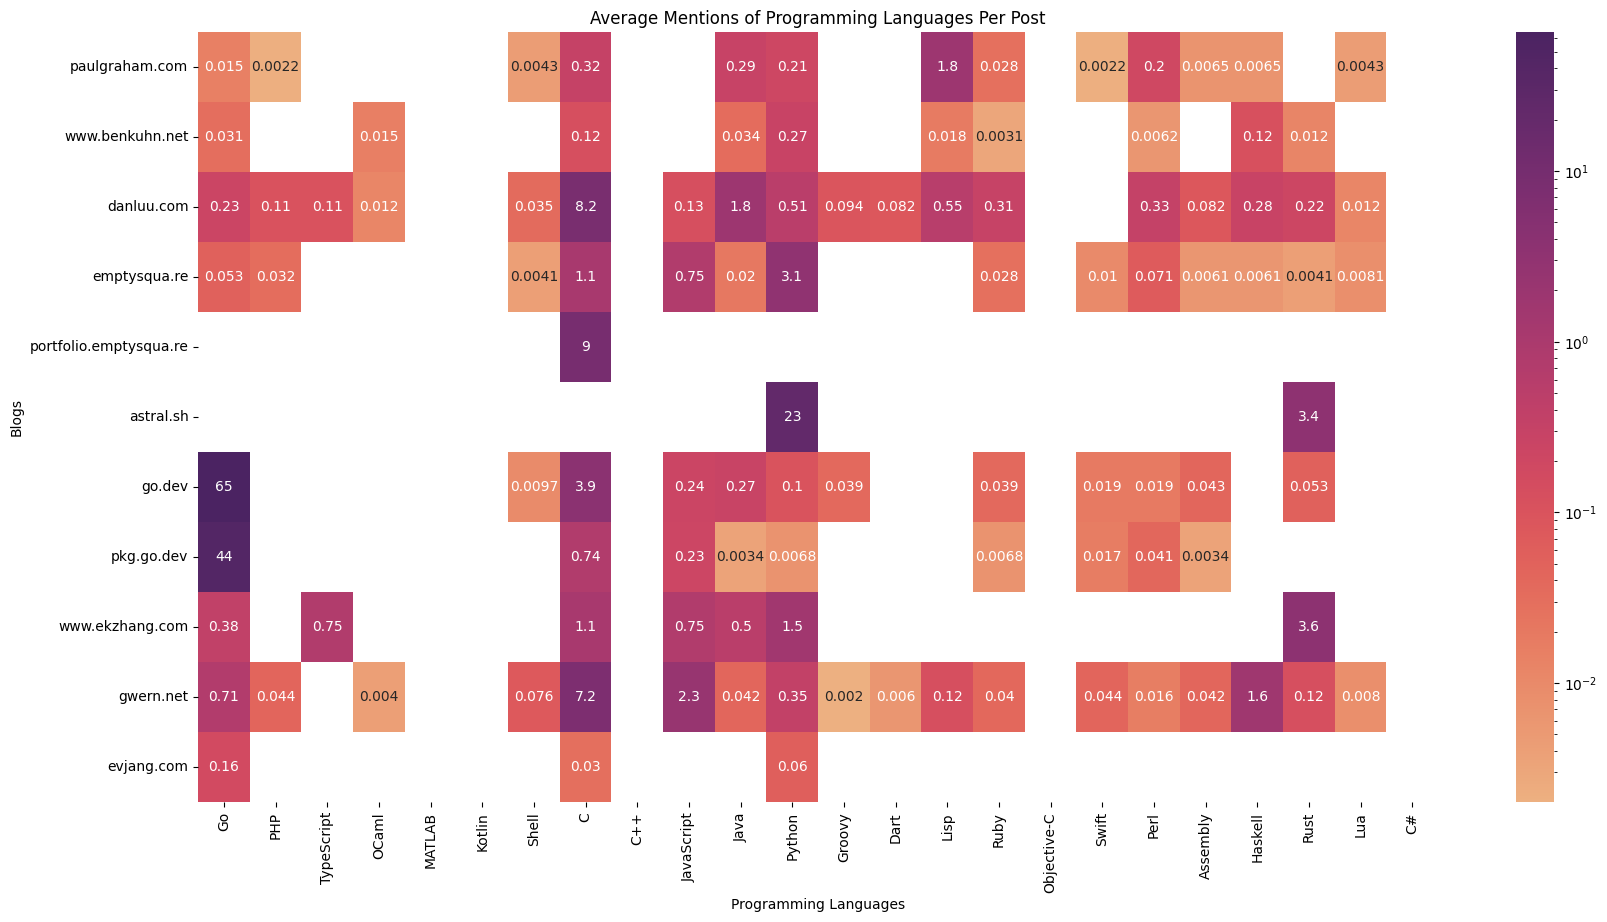

In [87]:
plt.figure(figsize=(20, 10))
# Use log cmap to handle outliers
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(mentions_table, annot=True, cmap=cmap, norm=colors.LogNorm())
plt.xlabel("Programming Languages")
plt.ylabel("Blogs")
plt.title("Average Mentions of Programming Languages Per Post")
plt.show()

### How often is each langauge mentioned together with another language?

In [88]:
result

,URL,DURATION,IP_ADDRESS,GEOLOCATION,LANGUAGES
0,http://paulgraham.com,0.58s,52.204.244.237,NaN,{}
1,-- http://paulgraham.com/info.html,0.53s,52.204.244.237,NaN,{}
2,---- http://paulgraham.com/index.html,0.69s,52.204.244.237,NaN,{}
3,-- http://paulgraham.com/bio.html,0.59s,52.204.244.237,NaN,"{""Lisp"": 3}"
4,-- http://paulgraham.com/bel.html,0.56s,52.204.244.237,NaN,"{""Lisp"": 3, ""C"": 1}"
...,...,...,...,...,...
2982,-- https://evjang.com/2020/09/13/chaos.html,0.37s,185.199.110.153,NaN,{}
2983,-- https://evjang.com/2016/09/16/riemann-bias....,0.35s,185.199.110.153,NaN,{}
2984,-- https://evjang.com/projects/,0.35s,185.199.110.153,NaN,{}
2985,-- https://evjang.com/2021/02/13/backprop.html,0.35s,185.199.110.153,NaN,{}


In [98]:
columns = ['language'] + list(programming_languages)
mentioned_together = pd.DataFrame(columns=columns).set_index('language')
for language in programming_languages:
    mentioned_together.loc[language] = [0 for _ in programming_languages]

lang_to_mentions = {lang: 1 for lang in programming_languages}  # pad with 1 to prevent div by 0

for index, row in result.iterrows():
    url = row['URL'].lstrip('-').strip()
    site = urlparse(url).netloc
    if site == "":
        print("Failed to parse", url)
        continue
    elif site == "www.swyx.io":
        continue

    lang_to_counts = ast.literal_eval(row['LANGUAGES'])

    langs = list(lang_to_counts.keys())
    for i in range(len(langs)):
        for j in range(i):
            lang1, lang2 = langs[i], langs[j]
            count1, count2 = lang_to_counts[lang1], lang_to_counts[lang2]
            mentioned_together.at[lang1, lang2] += 1
            mentioned_together.at[lang2, lang1] += 1

    for lang, count in lang_to_counts.items():
        lang_to_mentions[lang] += 1

# Normalize by number of mentions of language
dividers = [lang_to_mentions[lang] for lang in mentioned_together.index]
mentioned_together = mentioned_together.div(dividers, axis=0)

In [99]:
mentioned_together

,Go,PHP,TypeScript,OCaml,MATLAB,Kotlin,Shell,C,C++,JavaScript,...,Lisp,Ruby,Objective-C,Swift,Perl,Assembly,Haskell,Rust,Lua,C#
language,,,,,,,,,,,,,,,,,,,,,
Go,0.000000,0.026521,0.006240,0.007800,0.0,0.0,0.014041,0.326053,0.0,0.196568,...,0.024961,0.034321,0.0,0.026521,0.029641,0.015601,0.032761,0.031201,0.007800,0.0
PHP,0.447368,0.000000,0.078947,0.105263,0.0,0.0,0.105263,0.789474,0.0,0.657895,...,0.289474,0.263158,0.0,0.105263,0.263158,0.052632,0.315789,0.210526,0.131579,0.0
TypeScript,0.571429,0.428571,0.000000,0.428571,0.0,0.0,0.428571,0.571429,0.0,0.285714,...,0.428571,0.428571,0.0,0.000000,0.428571,0.142857,0.428571,0.571429,0.142857,0.0
OCaml,0.454545,0.363636,0.272727,0.000000,0.0,0.0,0.181818,0.818182,0.0,0.272727,...,0.363636,0.363636,0.0,0.000000,0.363636,0.181818,0.818182,0.636364,0.181818,0.0
MATLAB,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Kotlin,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Shell,0.333333,0.148148,0.111111,0.074074,0.0,0.0,0.000000,0.592593,0.0,0.592593,...,0.111111,0.185185,0.0,0.148148,0.148148,0.148148,0.185185,0.074074,0.074074,0.0
C,0.343750,0.049342,0.006579,0.014803,0.0,0.0,0.026316,0.000000,0.0,0.439145,...,0.113487,0.070724,0.0,0.036184,0.080592,0.027961,0.085526,0.059211,0.018092,0.0
C++,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


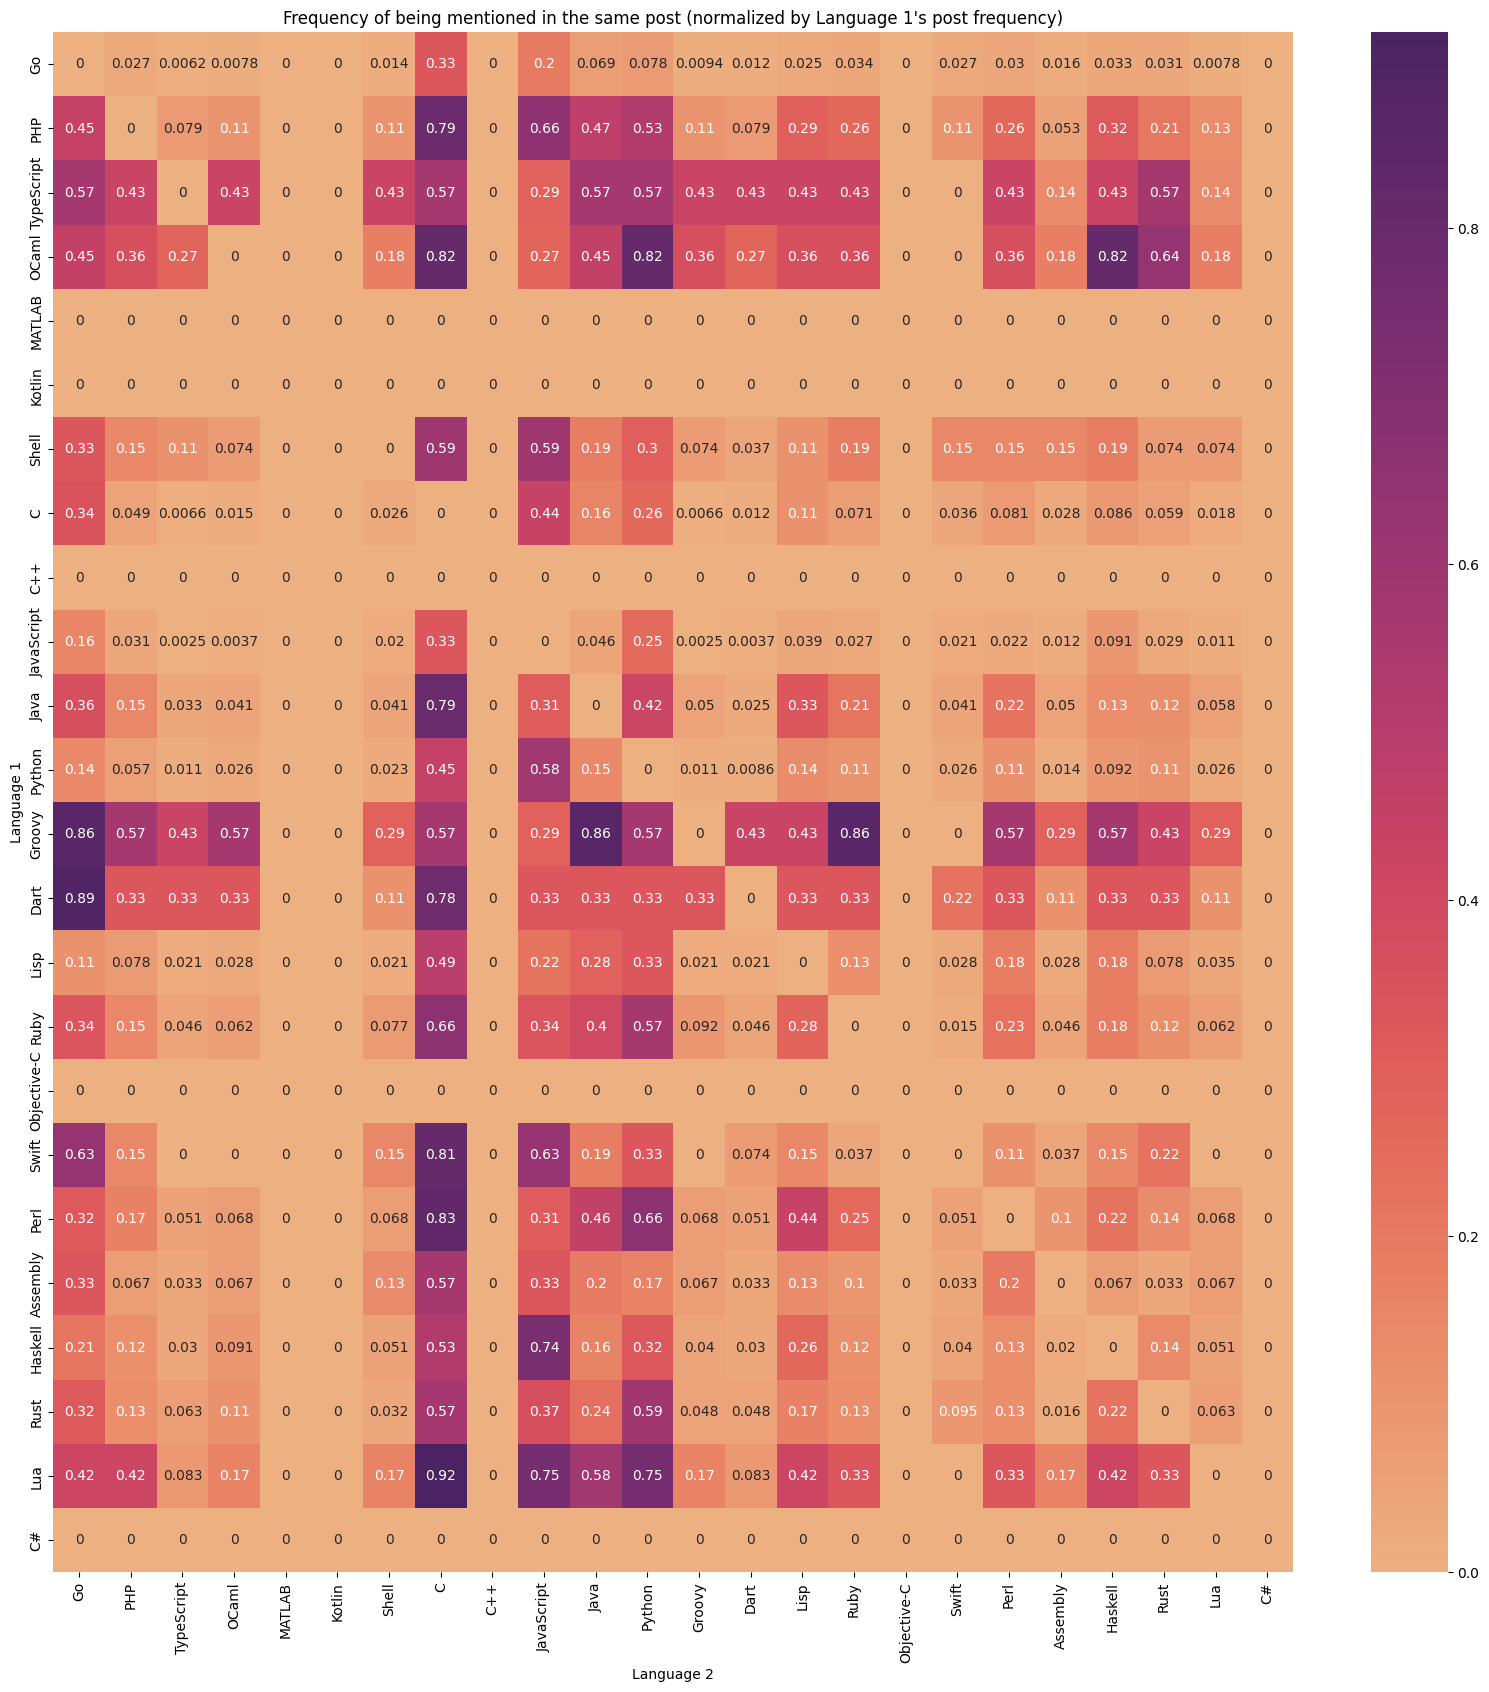

In [100]:
plt.figure(figsize=(20, 20))
# Use log cmap to handle outliers
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(mentioned_together, annot=True, cmap=cmap)
plt.xlabel("Language 2")
plt.ylabel("Language 1")
plt.title("Frequency of being mentioned in the same post (normalized by Language 1's post frequency)")
plt.show()